In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import the data
df = pd.read_csv('../Data/allele_counts.tsv', header = None, index_col = None, sep='\t')
df.iloc[0,0] = 'Plate'  #replace the first 3 rows so table makes more sense when stacked
df.iloc[1,0] = 'Amplicon'
df.iloc[2,0] = 'Genotype'
df = df.T #transpose the df
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

#Import information about plate cell type and patient
key = pd.read_excel('../Data/Amplicon_metadata_fixed.xlsx', sheet_name = 'PlateID')
key = key.drop(['Cell Origin', 'Plate Nr', 'Plate Name','Nr of cells', 'fcs-fle' ], axis=1)
key.rename(columns = {'Comments2':'Plate'}, inplace = True)
key.rename(columns = {'Cell-group':'Celltype'}, inplace = True)

#Merge allele counts and extra data
allele_counts = pd.merge(df, key, how = 'outer', on =['Plate'])
allele_counts.to_csv('../Results/allele_counts_metadata.tsv', index = None, sep = '\t') #Spit out data as a fresh file wih all the information to use later

#Re-order the columns
cols = list(allele_counts.columns.values) #Fetch column names as a list, these were manually edited below to move column order
allele_counts = allele_counts[['Plate', 'Genotype', 'Patient', 'Celltype', 'Amplicon', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21', 'G22', 'G23', 'G24', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'I11', 'I12', 'I13', 'I14', 'I15', 'I16', 'I17', 'I18', 'I19', 'I20', 'I21', 'I22', 'I23', 'I24', 'J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9', 'J10', 'J11', 'J12', 'J13', 'J14', 'J15', 'J16', 'J17', 'J18', 'J19', 'J20', 'J21', 'J22', 'J23', 'J24', 'K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9', 'K10', 'K11', 'K12', 'K13', 'K14', 'K15', 'K16', 'K17', 'K18', 'K19', 'K20', 'K21', 'K22', 'K23', 'K24', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10', 'L11', 'L12', 'L13', 'L14', 'L15', 'L16', 'L17', 'L18', 'L19', 'L20', 'L21', 'L22', 'L23', 'L24', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'M22', 'M23', 'M24', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11', 'N12', 'N13', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N24', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', 'O10', 'O11', 'O12', 'O13', 'O14', 'O15', 'O16', 'O17', 'O18', 'O19', 'O20', 'O21', 'O22', 'O23', 'O24', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', ]]

#Set up some lists for iteration
patients = allele_counts['Patient'].drop_duplicates().to_list()
plates = key['Plate'].tolist()
amplicons = allele_counts['Amplicon'].drop_duplicates().to_list()
genos = allele_counts['Genotype'].drop_duplicates().to_list()
wells = list(allele_counts.columns[5:].values)

#Make a dictionary to associate plates with patients and plate with cell type
plate_pt_dict = dict(zip(key.Plate, key.Patient))
plate_cell_dict = dict(zip(key.Plate, key.Celltype))

#Making a small list of plates to try some loop functions
miniplates = ['AS-209', 'AS-207']

Which patient to plot - EL, RN, GR? GR


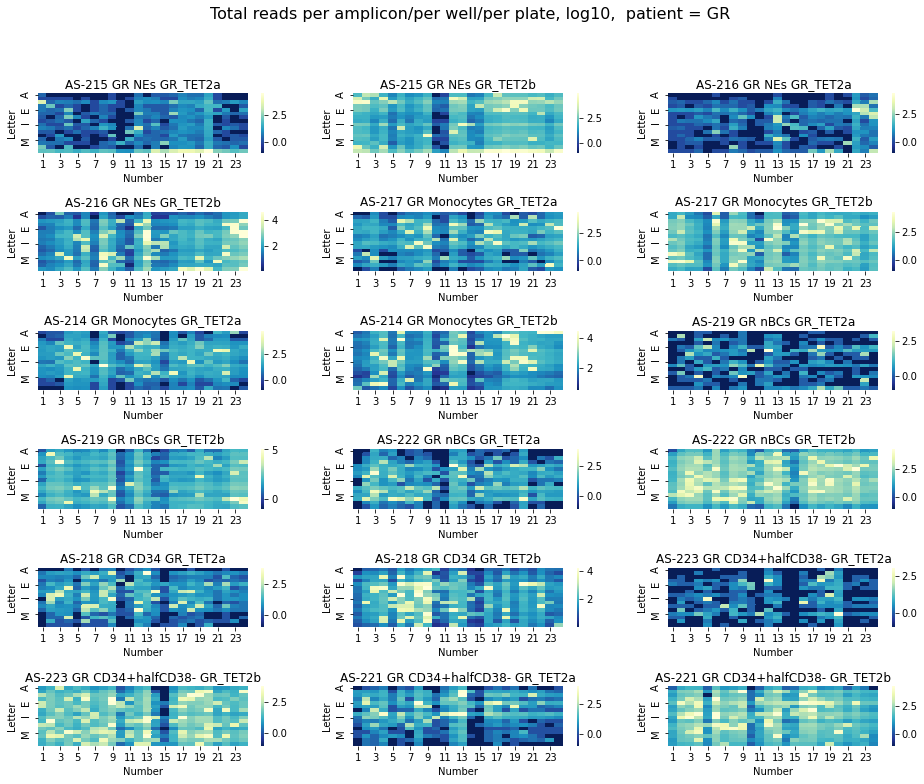

In [6]:
#Counts per amplicon per plate #Log 10 plots
#Plotting - lets try and plot by patient, with an input to ask which patient. 
#Then need to create a list that only contains the plates for that patient and use that for the loop iterations

#Select the patient

subject = input('Which patient to plot - EL, RN, GR? ')  #input the patient ID
plotplate = []
for key in plate_pt_dict:
    if plate_pt_dict.get(key) == subject:
        plotplate.append(key)
        
        
#Extract the amplicon count data just for that patient

amp_counts = {}  #empty dictionary to hold output
amps = []  #create empty list for amplicon lengths

for plate in plotplate: #iterate by plates for the given patient
    rows = [] #create empty list for dataframe row in each iteration
    
    i = allele_counts.loc[allele_counts['Plate'].isin([plate])]  #make a df just contining plate information
    j = plate_pt_dict.get(plate) #use the dict to make a variable that contains the patient name for the current plate
    m = plate_cell_dict.get(plate) #use the dict to make a variable that contains the cell type for the current plate
    for amp in amplicons: #now iterate by amplicons 
        k = i.loc[i['Amplicon'].isin([amp])]  #Make a sub df for each amplicon
        if (j in amp)==False:  #if the amplicon is for patient samples not on the plate keep going
            continue
                
        else:
            for well in wells:  
                total = k[well].astype(int).sum()  #sum the read counts for each well for each amplicon
                rows.append([plate, j, m, amp, well, total]) #put the output into a list of lists
                
    amp_counts[plate] = pd.DataFrame(rows, columns = ['Plate', 'Patient', 'Cell_type', 'Amplicon', 'Well', 'Count'])  
    amp_counts[plate].to_csv('../Results/Amp_counts/amp_counts_'+plate+'_'+subject+'.tsv', index = None, sep = '\t')    #Output to file
    quant_amps = len(amp_counts[plate]['Amplicon'].drop_duplicates().to_list())
    amps.append([plate,quant_amps])
    
plate_amps = pd.DataFrame(amps, columns = ['Plate', 'No_amps'])    #create df with number of amplicons per plate
amps_per_plate = dict(zip(plate_amps.Plate, plate_amps.No_amps))  #create dictionary with number of amplicons per plate

#Now plot the data
plot_num = plate_amps['No_amps'].astype(int).sum() #Calculate the number of plots for this patient to feed into figure dimensions
plot_len = (plot_num/3).astype(int)
plot_height = (plot_num/1.5)
count = -1

fig, axs = plt.subplots(plot_len,3, figsize = (16, plot_height))
fig.subplots_adjust(hspace = 1, wspace=.2)
axs = axs.ravel()

for plate in plotplate:
    #count = count + 1
    c = plate_cell_dict.get(plate) #use the dict to make a variable that contains the cell type for the current plate
    #drop unwanted columns and split well IDs
    amp_counts[plate] = amp_counts[plate].drop(columns = ['Plate', 'Patient', 'Cell_type']) 
    amp_counts[plate]['Number'] = amp_counts[plate]['Well'].str.replace('([A-Z]+)', '')
    amp_counts[plate]['Letter'] = amp_counts[plate]['Well'].str.extract('([A-Z]+)')
    amp_counts[plate] = amp_counts[plate].drop(columns = ['Well'])
    amplicon_plate = amp_counts[plate]['Amplicon'].drop_duplicates().to_list()

    #split into one table per amplicon
    no_tables = amps_per_plate.get(plate) #calculate how many tables to make for each plate
    amp_table = {} #empty dictionary for the output

    for amp in amplicon_plate: #now iterate through amplicons 
        count = count + 1
        b = amp_counts[plate].loc[amp_counts[plate]['Amplicon'].isin([amp])]  #Grab a sub-df for each amplicon
        b = b.pivot(index = 'Letter', columns = 'Number', values = 'Count')
        b = b.T
        b = b.reset_index()
        b['Number'] = b['Number'].astype(int)
        b = b.sort_values(by=['Number'])
        b = b.set_index('Number')
        b = b.T
        
        b = np.log10(0.1 + b)
    
        axs[count] = sns.heatmap(b, cmap = 'YlGnBu_r', ax = axs[count]) #Plot the data on the next ax
        axs[count].set_title(str(plate+' '+subject+' '+c+' '+amp)) #set title to contain plate and cell type
        
fig.suptitle('Total reads per amplicon/per well/per plate, log10,  patient = '+subject, fontsize=16)        
fig.savefig('../Results/Amp_counts/amp_counts_total_log_'+subject+'.png',dpi=600) 

Which patient to plot - EL, RN, GR? RN


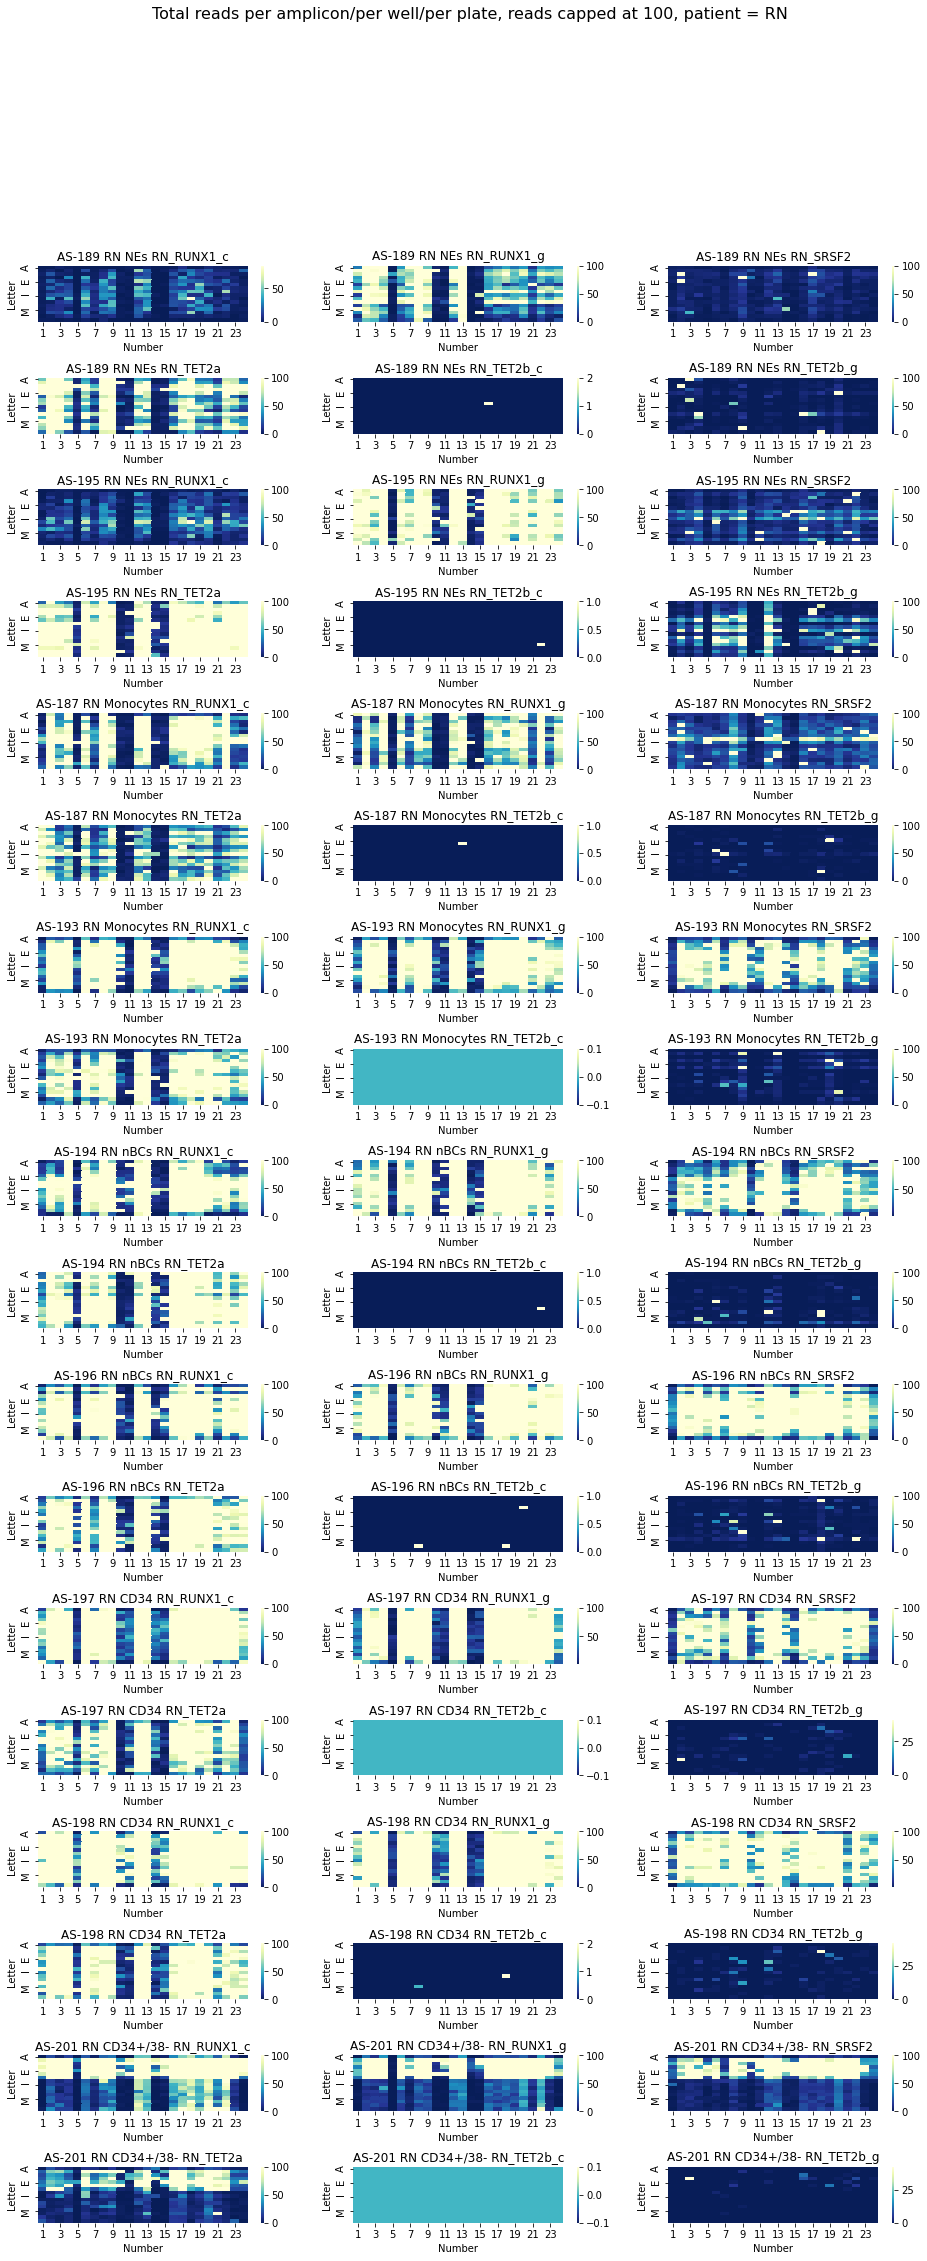

In [133]:
#Counts per amplicon per plate #Plots capped at 100
#Plotting - lets try and plot by patient, with an input to ask which patient. 
#Then need to create a list that only contains the plates for that patient and use that for the loop iterations

#Select the patient

subject = input('Which patient to plot - EL, RN, GR? ')  #input the patient ID
plotplate = []
for key in plate_pt_dict:
    if plate_pt_dict.get(key) == subject:
        plotplate.append(key)
        
        
#Extract the amplicon count data just for that patient

amp_counts = {}  #empty dictionary to hold output
amps = []  #create empty list for amplicon lengths

for plate in plotplate: #iterate by plates for the given patient
    rows = [] #create empty list for dataframe row in each iteration
    
    i = allele_counts.loc[allele_counts['Plate'].isin([plate])]  #make a df just contining plate information
    j = plate_pt_dict.get(plate) #use the dict to make a variable that contains the patient name for the current plate
    m = plate_cell_dict.get(plate) #use the dict to make a variable that contains the cell type for the current plate
    for amp in amplicons: #now iterate by amplicons 
        k = i.loc[i['Amplicon'].isin([amp])]  #Make a sub df for each amplicon
        if (j in amp)==False:  #if the amplicon is for patient samples not on the plate keep going
            continue
                
        else:
            for well in wells:  
                total = k[well].astype(int).sum()  #sum the read counts for each well for each amplicon
                rows.append([plate, j, m, amp, well, total]) #put the output into a list of lists
                
    amp_counts[plate] = pd.DataFrame(rows, columns = ['Plate', 'Patient', 'Cell_type', 'Amplicon', 'Well', 'Count'])  
    amp_counts[plate].to_csv('../Results/Amp_counts/amp_counts_'+plate+'_'+subject+'.tsv', index = None, sep = '\t')    #Output to file
    quant_amps = len(amp_counts[plate]['Amplicon'].drop_duplicates().to_list())
    amps.append([plate,quant_amps])
    
plate_amps = pd.DataFrame(amps, columns = ['Plate', 'No_amps'])    #create df with number of amplicons per plate
amps_per_plate = dict(zip(plate_amps.Plate, plate_amps.No_amps))  #create dictionary with number of amplicons per plate

#Now plot the data
plot_num = plate_amps['No_amps'].astype(int).sum() #Calculate the number of plots for this patient to feed into figure dimensions
plot_len = (plot_num/3).astype(int)
plot_height = (plot_num/1.5)
count = -1

fig, axs = plt.subplots(plot_len,3, figsize = (16, plot_height))
fig.subplots_adjust(hspace = 1, wspace=.2)
axs = axs.ravel()

for plate in plotplate:
    #count = count + 1
    c = plate_cell_dict.get(plate) #use the dict to make a variable that contains the cell type for the current plate
    #drop unwanted columns and split well IDs
    amp_counts[plate] = amp_counts[plate].drop(columns = ['Plate', 'Patient', 'Cell_type']) 
    amp_counts[plate]['Number'] = amp_counts[plate]['Well'].str.replace('([A-Z]+)', '')
    amp_counts[plate]['Letter'] = amp_counts[plate]['Well'].str.extract('([A-Z]+)')
    amp_counts[plate] = amp_counts[plate].drop(columns = ['Well'])
    amplicon_plate = amp_counts[plate]['Amplicon'].drop_duplicates().to_list()

    #split into one table per amplicon
    no_tables = amps_per_plate.get(plate) #calculate how many tables to make for each plate
    amp_table = {} #empty dictionary for the output

    for amp in amplicon_plate: #now iterate through amplicons 
        count = count + 1
        b = amp_counts[plate].loc[amp_counts[plate]['Amplicon'].isin([amp])]  #Grab a sub-df for each amplicon
        b = b.pivot(index = 'Letter', columns = 'Number', values = 'Count')
        b = b.T
        b = b.reset_index()
        b['Number'] = b['Number'].astype(int)
        b = b.sort_values(by=['Number'])
        b = b.set_index('Number')
        b = b.T
        
        b = np.minimum(b, 100)
    
        axs[count] = sns.heatmap(b, cmap = 'YlGnBu_r', ax = axs[count]) #Plot the data on the next ax
        axs[count].set_title(str(plate+' '+subject+' '+c+' '+amp)) #set title to contain plate and cell type
        
fig.suptitle('Total reads per amplicon/per well/per plate, reads capped at 100, patient = '+subject, fontsize=16)        
fig.savefig('../Results/Amp_counts/amp_counts_total_100cap_'+subject+'.png',dpi=600) 

In [98]:
#From Fabio - how many cells for each cell type in RN have all good amplicons with > 100 reads
#Just extract for RN at this stage, start with all amplicons (eventually just want to look at those that worked)
#Modify code above to put all data into a single df

#Select the patient

subject = 'RN'  #input the patient ID
plotplate = []
for key in plate_pt_dict:
    if plate_pt_dict.get(key) == subject:
        plotplate.append(key)

rows = [] #create empty list for dataframe row in each iteration -  this time will append all rows to this big df
        
#Extract the amplicon count data just for that patient
#Make lists of amplicons we are proceeding with
amplicons_RN = ['RN_RUNX1_c', 'RN_RUNX1_g', 'RN_SRSF2', 'RN_TET2a'] #these are the good amplicons

#amp_counts = {}  #empty dictionary to hold output
#amps = []  #create empty list for amplicon lengths

for plate in plotplate: #iterate by plates for the given patient
    #rows = [] #create empty list for dataframe row in each iteration
    
    i = allele_counts.loc[allele_counts['Plate'].isin([plate])]  #make a df just contining plate information
    j = plate_pt_dict.get(plate) #use the dict to make a variable that contains the patient name for the current plate
    m = plate_cell_dict.get(plate) #use the dict to make a variable that contains the cell type for the current plate
    for amp in amplicons_RN: #now iterate by amplicons 
        k = i.loc[i['Amplicon'].isin([amp])]  #Make a sub df for each amplicon
        if (j in amp)==False:  #if the amplicon is for patient samples not on the plate keep going
            continue
                
        else:
            for well in wells:  
                total = k[well].astype(int).sum()  #sum the read counts for each well for each amplicon
                rows.append([plate, j, m, amp, well, total]) #put the output into a list of lists
               
                
amp_counts_RN = pd.DataFrame(rows, columns = ['Plate', 'Patient', 'Cell_type', 'Amplicon', 'Well', 'Count'])  #Put everything in a single df

#amp_counts_RN.to_csv('../Results/Amp_counts/amp_counts_all_plates_RN.tsv', index = None, sep = '\t')

#drop unwanted column and re-order the rest
amp_counts_RN = amp_counts_RN.drop(columns = ['Patient']) 
amp_counts_RN = amp_counts_RN[['Plate', 'Well', 'Cell_type', 'Amplicon', 'Count']]

#Make an iterable list of column names first

cols = amp_counts_RN['Amplicon'].drop_duplicates().to_list()

#Now flip the df to split amplicons into individual columns
#Simple solution is to join plate_well_cell into a single column, but this feels clunky.
#Try something better first - failed this, need to understand stack, unstack, pivot better

amp_counts_RN['Join_cols'] = amp_counts_RN['Plate'] + '_' + amp_counts_RN['Well'] + '_' + amp_counts_RN['Cell_type']
amp_counts_RN = amp_counts_RN.drop(columns = ['Plate', 'Well', 'Cell_type']) 
amp_counts_RN = amp_counts_RN[['Join_cols', 'Amplicon', 'Count']]
amp_counts_RN = amp_counts_RN.pivot(index = 'Join_cols', columns = 'Amplicon', values = 'Count')

#Now pull out only the rows with at least 100 reads
#Iterate over rows

read_filter = []

#The following works but it's awful code

for idx, row in amp_counts_RN.iterrows():
    if (row['RN_RUNX1_c'] > 99) & (row['RN_RUNX1_g'] > 99) & (row['RN_SRSF2'] > 99) & (row['RN_TET2a'] > 99): #if there are at least 100 reads keep going
        c = [idx, row['RN_RUNX1_c'], row['RN_RUNX1_g'], row['RN_SRSF2'], row['RN_TET2a']]
        read_filter.append(c)
            
    else:
        continue
        
#Put everything back into a dataframe and split the ID column again
        
#read_filter_RN = pd.DataFrame(read_filter, columns = ['Plate_well_celltype','RN_RUNX1_c', 'RN_RUNX1_g', 'RN_SRSF2', 'RN_TET2a'])        
        
#Fabio's much better solution

read_filter_RN = amp_counts_RN.loc[(amp_counts_RN >= 100).all(axis=1)]

read_filter_RN.to_csv('../Results/Amp_counts/RN_amp_counts_over_99_all_amps.tsv',  sep = '\t')
read_filter_RN

Amplicon,RN_RUNX1_c,RN_RUNX1_g,RN_SRSF2,RN_TET2a
Join_cols,,,,
AS-193_B12_Monocytes,4917,2973,115,840
AS-193_B13_Monocytes,118,168,1084,721
AS-193_C16_Monocytes,1039,1496,601,562
AS-193_C20_Monocytes,326,242,108,261
AS-193_C6_Monocytes,776,349,113,161
...,...,...,...,...
AS-201_G20_CD34+/38-,4532,3182,1391,1255
AS-201_G21_CD34+/38-,1866,724,451,355
AS-201_G22_CD34+/38-,733,4359,125,2048


In [95]:
#idx = (amp_counts_RN >= 100).all(axis=1) <----Fabio's help
#idx.index[idx]
cells100 = amp_counts_RN.loc[(amp_counts_RN >= 100).all(axis=1)]
cells50 = amp_counts_RN.loc[(amp_counts_RN >= 50).all(axis=1)]
cells10 = amp_counts_RN.loc[(amp_counts_RN >= 10).all(axis=1)]

print('Cells with at least 10 reads per amplicon = ' + str(cells10.shape[0]))
print('Cells with at least 50 reads per amplicon = ' + str(cells50.shape[0]))
print('Cells with at least 100 reads per amplicon = ' + str(cells100.shape[0]))

Cells with at least 10 reads per amplicon = 2149
Cells with at least 50 reads per amplicon = 1178
Cells with at least 100 reads per amplicon = 756


In [130]:
#How many cells for each cell type?

blah = read_filter_RN.index.tolist()
mono = 0
nBC = 0
NE = 0
HSPC = 0
HSC = 0

for b in blah:
    if 'Monocyte' in b:
        mono = mono + 1
    
    elif 'nBC' in b:
        nBC = nBC + 1
        
    elif 'NE' in b:
        NE = NE + 1
        
    elif 'CD34+' in b:
        HSC = HSC + 1
        
    else:
        HSPC = HSPC + 1

print('For cells with at least 100 reads per amplicon, # monocytes = ' + str(mono) + ', # naive B cells = ' + str(nBC) +', # neutrophils = ' + str(NE) + ', # HSPC = ' +str(HSPC) + ', # HSC = ' +str(HSC))
print('Total number of cells  = ' +str(mono + nBC + NE + HSC + HSPC))

For cells with at least 100 reads per amplicon, # monocytes = 111, # naive B cells = 286, # neutrophils = 0, # HSPC = 318, # HSC = 41
Total number of cells  = 756


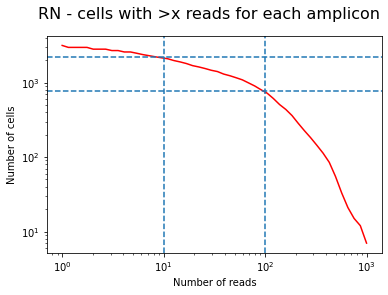

In [86]:
#Fabio's code to plot the output - this is a really useful way to look at data
x = np.logspace(0, 3, 50)   #sets the axis space - returns from log 0 to log 3 in 50 equal increments
y = [amp_counts_RN.loc[(amp_counts_RN >= xi).all(axis=1)].shape[0] for xi in x] #This filters the df to contain the number 
#of cells (rows) that meet each iteration, and shape[0] essentially returns the number of rows (ie/ the dimension on axis = 0)
fig, ax = plt.subplots()
ax.plot(x, y, color = 'red')
ax.set_yscale('log')
ax.set_xscale('log')
ax.axvline(10, ls = '--')
ax.axvline(100, ls = '--')
ax.axhline(2200, ls = '--')
ax.axhline(780, ls = '--')
ax.set_xlabel('Number of reads')
ax.set_ylabel('Number of cells')

fig.suptitle('RN - cells with >x reads for each amplicon', fontsize=16)        
fig.savefig('../Results/Amp_counts/RN_amp_counts_per_cell.png',dpi=600) 


In [88]:
y = [amp_counts_RN.loc[(amp_counts_RN >= xi).all(axis=1)].shape[0] for xi in x]
print(y)

[3149, 2965, 2965, 2965, 2965, 2807, 2807, 2807, 2689, 2689, 2574, 2574, 2474, 2372, 2293, 2217, 2149, 2086, 1973, 1892, 1800, 1687, 1620, 1544, 1462, 1405, 1300, 1235, 1161, 1088, 990, 900, 802, 720, 611, 507, 436, 361, 284, 226, 182, 144, 113, 85, 55, 33, 21, 15, 12, 7]


In [136]:
dff = pd.read_csv('../Data/allele_counts.tsv', header = [0,1,2], index_col = 0, sep='\t').T
dff['amplicon']  = dff.index.get_level_values(1)
dff['plate']  = dff.index.get_level_values(0)
dff['allele'] = dff.index.get_level_values(2)

#dff.set_index(['amplicon', 'plate', 'allele'])
dff
#df_all = dff.groupby(['plate', 'amplicon']).sum().stack()#.to_frame(name='coverage')
#df_all.loc[df_all > 100]

A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  ...  P18  P19  \
AS-209 EL_SRSF2   MT   0   0   0   0   0   0   0   0   0    0  ...    0    0   
                  WT   0   0   3   0   0   0   0   0   0    0  ...    3    0   
       EL_TET2a   MT   0   2   0   0   0   0   0   0  90    0  ...    0    0   
                  WT   0   1   0   0   0   0   0   0  11    0  ...    0    0   
       EL_TET2b   MT   0   0   0   0   0   0   0   0   0    0  ...    0    0   
...                   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...   
AS-207 EL_TET2b   WT   1   3   9   4   5   1   1  10  16    1  ...    5   20   
       EL_TGFB3_c MT   0   0   0   0   0   0   5   0   0    0  ...    0    0   
                  WT   0   0   0   0   0   0   0   0   0    0  ...    0    0   
       EL_TGFB3_g MT   0   0   0   0   0   0   0   0   0    0  ...    0    0   
                  WT   0   1   0   0   0   0   0   0   0    1  ...    0    1   

                      P20  P21  P22  P23  P24    amplicon   plate  allele  
AS-209 EL_SRSF2   MT    1    0    0    1    0    EL_SRSF2  AS-209      MT  
                  WT    3    4    1  248    4    EL_SRSF2  AS-209      WT  
       EL_TET2a   MT    0    0   13    0    0    EL_TET2a  AS-209      MT  
                  WT    0    1   50   24   55    EL_TET2a  AS-209      WT  
       EL_TET2b   MT    0    0    0    0    0    EL_TET2b  AS-209      MT  
...                   ...  ...  ...  ...  ...         ...     ...     ...  
AS-207 EL_TET2b   WT   58    8   18    1    5    EL_TET2b  AS-207      WT  
       EL_TGFB3_c MT    0    0    0    0    0  EL_TGFB3_c  AS-207      MT  
                  WT    1    0    0    0    0  EL_TGFB3_c  AS-207      WT  
       EL_TGFB3_g MT    0    0    0    1    0  EL_TGFB3_g  AS-207      MT  
                  WT    2    2    2    1    0  EL_TGFB3_g  AS-207      WT  

[220 rows x 387 columns]

In [65]:
dff = pd.read_csv('../Data/allele_counts.tsv', header = [0,1,2], index_col = 0, sep='\t').T
dff.loc[(slice(None), slice(None), 'MT'), :]

A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  ...  P15  P16  \
AS-209 EL_SRSF2   MT   0   0   0   0   0   0   0   0   0    0  ...    0    0   
       EL_TET2a   MT   0   2   0   0   0   0   0   0  90    0  ...    0    1   
       EL_TET2b   MT   0   0   0   0   0   0   0   0   0    0  ...    0    0   
       EL_TGFB3_g MT   0   0   0   0   0   0   0   0   0    0  ...    0    0   
AS-196 RN_RUNX1_c MT   0   0   0   0   0   2   0   1   0    0  ...    0    0   
...                   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...   
AS-207 EL_SRSF2   MT   0   1   3   3   0   8   4   6   9    0  ...    1   25   
       EL_TET2a   MT   0   4   7   3   0  17   7  13   6    2  ...   10   62   
       EL_TET2b   MT   0   0   1   6   5   1  12   3   4    0  ...    0   17   
       EL_TGFB3_c MT   0   0   0   0   0   0   5   0   0    0  ...    0    0   
       EL_TGFB3_g MT   0   0   0   0   0   0   0   0   0    0  ...    0   10   

                      P17  P18  P19  P20  P21  P22  P23  P24  
AS-209 EL_SRSF2   MT    0    0    0    1    0    0    1    0  
       EL_TET2a   MT    0    0    0    0    0   13    0    0  
       EL_TET2b   MT    0    0    0    0    0    0    0    0  
       EL_TGFB3_g MT    0    0    0    0    0    0    0    0  
AS-196 RN_RUNX1_c MT    0    3    0   20    0    0    1    0  
...                   ...  ...  ...  ...  ...  ...  ...  ...  
AS-207 EL_SRSF2   MT   12    9   11   39   10   17    5    1  
       EL_TET2a   MT   24   48  137   45   47   59  802   17  
       EL_TET2b   MT   15   31   16   57   32   27    3    2  
       EL_TGFB3_c MT    0    0    0    0    0    0    0    0  
       EL_TGFB3_g MT    0    0    0    0    0    0    1    0  

[108 rows x 384 columns]